<img src="./assets/ga-logo.png" style="float: left; margin: 20px; height: 55px">

# Lab: Simple Linear Regression with Sacramento Real Estate Data - Sample Solution

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [203]:
shd = pd.read_csv("sacramento_real_estate_transactions.csv")

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [204]:
# Check the dtypes.
shd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [205]:
# Zip code works better as a string object (categorical) so we will have to convert it.
shd['zip'] = shd['zip'].astype('category')

_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

In [206]:
# Check out the summary statistics:
shd.describe()

,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [264]:
# Check out the cities. Most cities have very few observations.
city_counts = shd['city'].value_counts()
shd = shd[shd['city'].isin(city_counts[city_counts > 5].index)]
city_counts[city_counts > 5].index

Index(['SACRAMENTO', 'ELK GROVE', 'CITRUS HEIGHTS', 'ANTELOPE', 'ROSEVILLE',
       'RANCHO CORDOVA', 'NORTH HIGHLANDS', 'GALT', 'CARMICHAEL', 'FOLSOM',
       'RIO LINDA', 'ORANGEVALE', 'FAIR OAKS', 'ROCKLIN', 'LINCOLN'],
      dtype='object', name='city')

In [207]:
shd.loc[shd['sq__ft']<0,'sq__ft'] = - shd.loc[shd['sq__ft']<0,'sq__ft']
shd.loc[shd['price']<0,'price'] = - shd.loc[shd['price']<0,'price']

In [209]:
shd = shd[shd['beds'] > 0]
shd = shd[shd['price'] > 0]
shd = shd[(shd['sq__ft'] > 0) & (shd['sq__ft'] < 5000 )]

In [177]:
# What about the houses that are less than 0 dollars?


In [210]:
# And the houses with negative square footage?
shd['price'].sort_values()

603     30000
335     40000
336     48000
605     55422
867     56950
        ...  
552    691659
333    699000
553    760000
334    839000
864    884790
Name: price, Length: 813, dtype: int64

In [179]:
# Let's check if any other values are labeled incorrectly.


In [211]:
# It looks like only one row is mislabeled, so we'll just drop that row.
shd.drop(703, inplace=True)
shd.reset_index(drop=True)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768
...,...,...,...,...,...,...,...,...,...,...,...,...
807,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
808,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
809,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
810,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424


### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

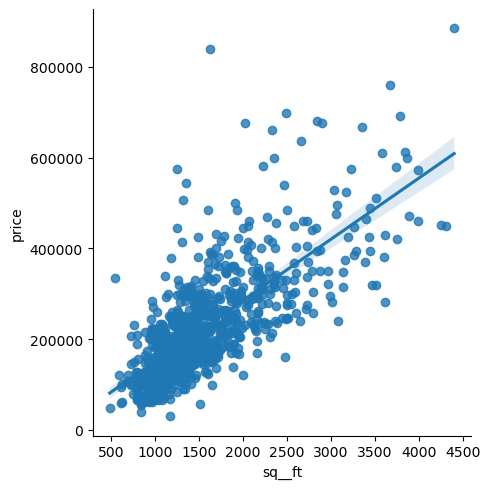

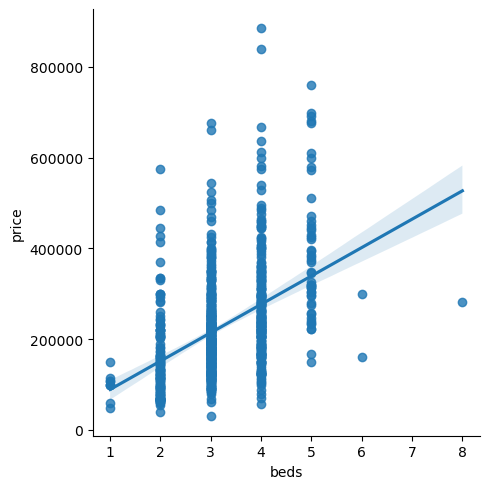

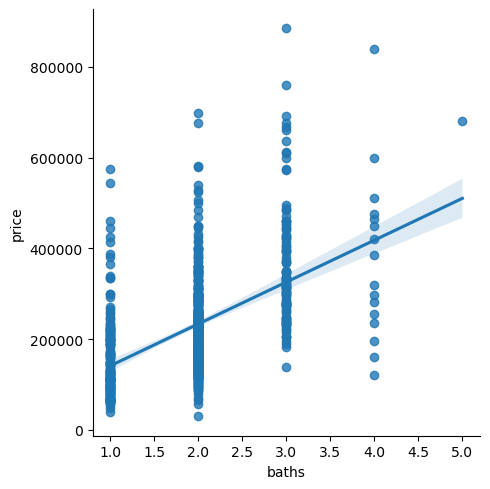

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.lmplot(x='sq__ft', y='price', data=shd)
plt.show()
sns.lmplot(x='beds', y='price', data=shd)
plt.show()
sns.lmplot(x='baths', y='price', data=shd)
plt.show()

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

### 5. Build a Linear Regression model that will take in  `y` and `X`, and return the intercept and slope coefficients.. 

`y` is the target variable and `X` is the predictor variable.

- **Report the slope and intercept.**

In [213]:
X = shd[['sq__ft',]]
y = shd['price']

In [214]:
lr = LinearRegression()
lr.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### 6. Interpret the intercept. Interpret the slope.

In [215]:
lr.intercept_

15943.749961489317

In [216]:
lr.coef_

array([134.75120754])

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

### 8: [Bonus] Using the model you came up with in Problem 5, calculate the residuals.

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [250]:
X = shd[['sq__ft','zip','beds','baths']]
y = shd['price']

X = pd.get_dummies(columns = ['zip'], drop_first=True, data=X)

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [252]:
lr = LinearRegression()
lr2  = LinearRegression()
lr.fit(X,y)
lr2.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [253]:
print(lr.coef_)
print(lr2.coef_)

[ 1.15672964e+02 -7.52626822e+03  4.47649486e+03  5.05617844e+04
 -2.13242033e+04 -6.27464033e-07 -2.87727744e-08 -3.05186051e+04
 -3.27854650e-07 -3.10675509e+04  1.00590114e-07  4.49901787e+04
  9.70687538e+04 -9.34596756e-09 -2.17394089e+04 -6.25732355e-10
  5.90807758e-09  1.10817728e+04 -1.32422429e-09 -1.45519152e-10
 -6.16453144e+04  6.41211617e+04  2.48218629e+04  1.45519152e-11
 -7.27595761e-12 -2.81156088e+04 -2.15269679e+04  1.91384026e+04
 -6.87482774e+02 -5.82076609e-11  0.00000000e+00  7.27595761e-12
 -7.27595761e-12 -1.45519152e-11 -5.09317033e-11  4.36557457e-11
 -8.45436742e+04 -3.63797881e-12  3.22991378e+04 -1.02555216e+04
 -2.25132547e+04  5.45696821e-12  6.83041433e+04  1.67708005e+05
  8.84421400e+04 -7.39925411e+04  1.05497196e+05 -4.17877817e+04
  7.83340642e+04  2.09108798e+05 -4.00372778e+04 -7.99688907e+02
 -4.11517051e+04 -5.52188519e+04 -6.99935194e+04 -2.50265133e+04
 -3.76500780e+04 -5.59706400e+04 -5.28130098e+04 -3.51356052e+04
  3.87454583e+04 -7.82539

In [254]:
set(zip(X.columns, lr.coef_))
set(zip(X.columns, lr2.coef_))

{('baths', 4917.076238077978),
 ('beds', -4574.987715261364),
 ('sq__ft', 108.62876503365783),
 ('zip_95608', 48027.380576621),
 ('zip_95610', -23266.6399696421),
 ('zip_95614', -1.6007106751203537e-10),
 ('zip_95619', 3.54702933691442e-11),
 ('zip_95621', -36915.75253230368),
 ('zip_95623', 1.4551915228366852e-11),
 ('zip_95624', -27657.014726389687),
 ('zip_95626', 5.820766091346741e-11),
 ('zip_95628', 111703.5301956149),
 ('zip_95630', 91062.04621931419),
 ('zip_95631', 6.184563972055912e-11),
 ('zip_95632', -16931.288610767653),
 ('zip_95633', 8.731149137020111e-11),
 ('zip_95635', -1.2369127944111824e-10),
 ('zip_95648', 21693.164483292436),
 ('zip_95650', 3.637978807091713e-11),
 ('zip_95655', 8.731149137020111e-11),
 ('zip_95660', -62039.35669372973),
 ('zip_95661', 71398.56953666065),
 ('zip_95662', 21709.44603767884),
 ('zip_95663', 9.458744898438454e-11),
 ('zip_95667', -8.731149137020111e-11),
 ('zip_95670', -36729.16565588231),
 ('zip_95673', -21379.8820977153),
 ('zip_956

In [255]:
print(lr.intercept_)
print(lr2.intercept_)

80144.88849907246
82015.41736851697


In [256]:
y_pred = lr.predict(X)
y_pred2 = lr2.predict(X_test)

In [257]:
# R2:
train_r2 = metrics.r2_score(y, y_pred)
test_r2 = metrics.r2_score(y_test, y_pred2)
print(train_r2)
print(test_r2)

0.7009700147211626
0.6946672662493973


---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 10. Remove "Unkown" from four dummy coded variable dataframe and append the rest to the original data.

### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

_I'm going to engineer a new dummy variable for 'HUGE houses'.  Those whose square footage is 3 (positive) standard deviations away from the mean._
```
Mean = 1315
STD = 853
Huge Houses > 3775 sq ft
```

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

> **Tip:** with seaborn's `sns.lmplot` you can set `x`, `y`, and even a `hue` (which will plot regression lines by category in different colors) to easily plot a regression line.

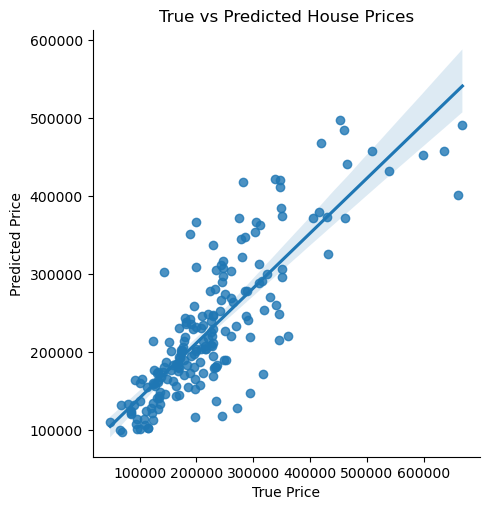

In [262]:
# Plot regression line between true and predicted prices
results = pd.DataFrame({'True Price': y_test, 'Predicted Price': y_pred2})
sns.lmplot(x='True Price', y='Predicted Price', data=results)

# Add title and labels
plt.title('True vs Predicted House Prices')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

plt.show()

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

**SLR AND MLR**:  

- *Linearity: Y must have an approximately linear relationship with each independent X_i.*
- *Independence: Errors (residuals) e_i and e_j must be independent of one another for any i != j.*
- *Normality: The errors (residuals) follow a Normal distribution.*
- *Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the X_i. (There should be no discernable relationship between X_1 and the residuals.)*

**MLR ONLY**:  
- *Independence Part 2: The independent variables X_i and X_j must be independent of one another for any i != j*





### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

In [ ]:
# Normality:  Do the Residual Errors follow a normal distribution?



In [ ]:
# Equality of variance.  



### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

MSE, RMSE, R squared